In [12]:
from flyanalysis import braidz
from flyanalysis import filtering
from flyanalysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from flyanalysis.plotting import plot_mean_and_std
from flyanalysis.plotting import plot_trajectory

In [13]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240822_105738.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240822_105738.braidz using pyarrow


In [14]:
df,csvs["stim"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0   318876  1.724320e+09 -0.035925  0.015237  0.297488   
 1             0   318877  1.724320e+09 -0.038463  0.013647  0.297346   
 2             1   318878  1.724320e+09 -0.033808  0.019092  0.296968   
 3             0   318878  1.724320e+09 -0.041001  0.012058  0.297203   
 4             0   318879  1.724320e+09 -0.051230  0.013732  0.292426   
 ...         ...      ...           ...       ...       ...       ...   
 1201874   13063  8920078  1.724406e+09  0.043902  0.110792  0.326708   
 1201875   13063  8920079  1.724406e+09  0.044633  0.111219  0.327102   
 1201876   13063  8920080  1.724406e+09  0.045355  0.111622  0.327478   
 1201877   13063  8920081  1.724406e+09  0.046048  0.111940  0.327874   
 1201878   13063  8920082  1.724406e+09  0.046592  0.112193  0.328239   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.253786 -0.158914 -0.014236  2.265415e-07

In [23]:
timestamp_column = csvs["stim"]["timestamp"]
print(timestamp_column)
timestamp_column.to_csv('timestamp_output.csv', index=False)

0     1.724335e+09
1     1.724335e+09
2     1.724335e+09
3     1.724335e+09
4     1.724335e+09
5     1.724335e+09
6     1.724336e+09
7     1.724336e+09
8     1.724345e+09
9     1.724346e+09
10    1.724346e+09
11    1.724348e+09
12    1.724348e+09
13    1.724349e+09
14    1.724349e+09
15    1.724350e+09
16    1.724350e+09
17    1.724350e+09
18    1.724351e+09
19    1.724351e+09
20    1.724352e+09
21    1.724352e+09
22    1.724352e+09
23    1.724354e+09
24    1.724355e+09
25    1.724400e+09
26    1.724401e+09
Name: timestamp, dtype: float64


In [15]:
data = extract_stimulus_centered_data(df, csvs["stim"])

In [16]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{262, 316, 348, 353, 366, 388, 395, 2515, 3428, 12496, 12518}

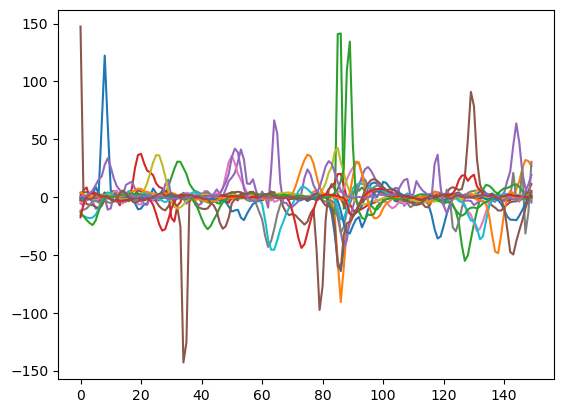

In [17]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

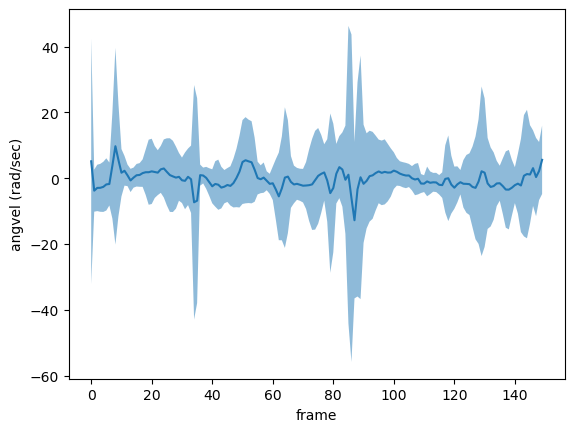

In [18]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

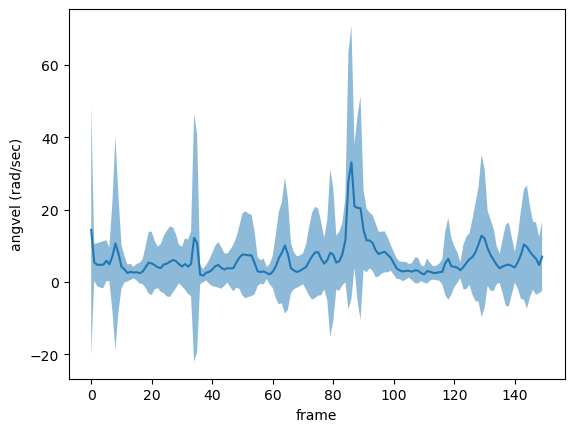

In [19]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

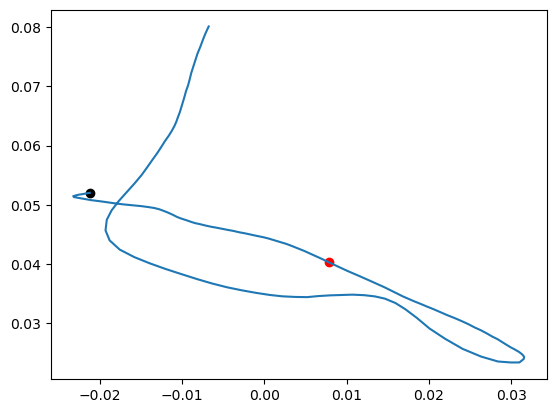

In [20]:
i = 0
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

<Axes: >

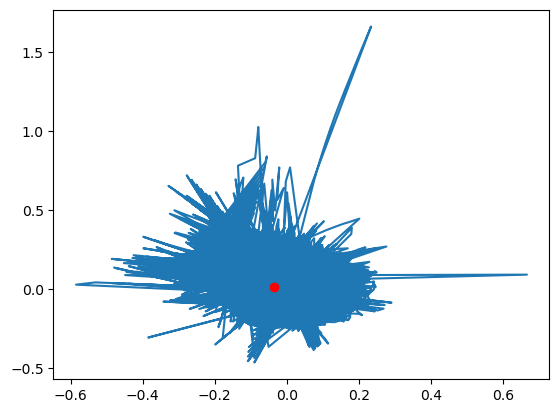

In [21]:
plot_trajectory(df)

In [22]:
df,csvs["stim"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0   318876  1.724320e+09 -0.035925  0.015237  0.297488   
 1             0   318877  1.724320e+09 -0.038463  0.013647  0.297346   
 2             1   318878  1.724320e+09 -0.033808  0.019092  0.296968   
 3             0   318878  1.724320e+09 -0.041001  0.012058  0.297203   
 4             0   318879  1.724320e+09 -0.051230  0.013732  0.292426   
 ...         ...      ...           ...       ...       ...       ...   
 1201874   13063  8920078  1.724406e+09  0.043902  0.110792  0.326708   
 1201875   13063  8920079  1.724406e+09  0.044633  0.111219  0.327102   
 1201876   13063  8920080  1.724406e+09  0.045355  0.111622  0.327478   
 1201877   13063  8920081  1.724406e+09  0.046048  0.111940  0.327874   
 1201878   13063  8920082  1.724406e+09  0.046592  0.112193  0.328239   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.253786 -0.158914 -0.014236  2.265415e-07